#UTS-Nomer 01-10219081-Axel Farrel Hutagalung

1. Write function linear_regression() to calculate c_0 and c_1 with input parameters are x and y, where both are list with the same length. 

In [1]:
def linear_regression(x, y):
    n = len(x)
    x_mean = sum(x) / n
    y_mean = sum(y) / n
    xy_mean = sum([x[i] * y[i] for i in range(n)]) / n
    x_squared_mean = sum([x[i] ** 2 for i in range(n)]) / n

    c_1 = (xy_mean - x_mean * y_mean) / (x_squared_mean - x_mean ** 2)
    c_0 = y_mean - c_1 * x_mean

    return c_0, c_1

2. Write functions linear_interpol() to calculate linear interpolation with input parameters are x and y, where both are list with the same length.

In [2]:
def linear_interpol(x, y, x_interp):
    n = len(x)
    if x_interp < x[0] or x_interp > x[-1]:
        raise ValueError("x_interp must be within the range of x values")

    i = 0
    while i < n and x_interp > x[i]:
        i += 1

    if i == 0:
        return y[0]
    elif i == n:
        return y[-1]
    else:
        c_0, c_1 = linear_regression([x[i-1], x[i]], [y[i-1], y[i]])
        return c_0 + c_1 * x_interp

3. Write functions lagrange_interpol() to calculate Lagrange polynomial interpolation with input parameters are x and y, where both are list with the same length.

In [3]:
def lagrange_interpol(x, y, x_interp):
    n = len(x)
    result = 0.0
    for i in range(n):
        term = y[i]
        for j in range(n):
            if j != i:
                term *= (x_interp - x[j]) / (x[i] - x[j])
        result += term
    return result

4. Plot curves using, directly or indirectly, the functions linear_regression(), linear_interpol(), lagrange_interpol(), and the data x and y. Set right label to each series and show them in the plot legend.

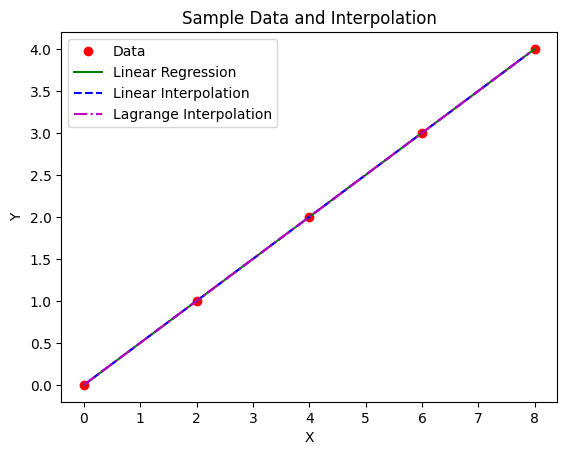

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data
x = [0, 2, 4, 6, 8]
y = [0, 1, 2, 3, 4]

# Linear regression line
c0, c1 = linear_regression(x, y)
lin_reg_line = [c0 + c1 * xi for xi in x]

# Linear interpolation line
lin_interp_line = [linear_interpol(x, y, xi) for xi in np.arange(0, 8, 0.1)]

# Lagrange interpolation line
lag_interp_line = [lagrange_interpol(x, y, xi) for xi in np.arange(0, 8, 0.1)]

# Plot the data and lines
plt.plot(x, y, 'ro', label='Data')
plt.plot(x, lin_reg_line, 'g-', label='Linear Regression')
plt.plot(np.arange(0, 8, 0.1), lin_interp_line, 'b--', label='Linear Interpolation')
plt.plot(np.arange(0, 8, 0.1), lag_interp_line, 'm-.', label='Lagrange Interpolation')

# Set plot title and axis labels
plt.title('Sample Data and Interpolation')
plt.xlabel('X')
plt.ylabel('Y')

# Set plot legend
plt.legend()

# Show the plot
plt.show()